In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')

In [2]:
data1 = pd.read_csv("plant_data.csv")
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21128 entries, 0 to 21127
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        21128 non-null  object 
 1   Time        21128 non-null  object 
 2   Hours       21128 non-null  int64  
 3   Soil_Moist  21128 non-null  int64  
 4   Amb_temp    21128 non-null  float64
 5   Humidity    21128 non-null  int64  
 6   Soil_temp   21128 non-null  float64
 7   Photo_Re    21128 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.3+ MB


In [3]:
data1

,Date,Time,Hours,Soil_Moist,Amb_temp,Humidity,Soil_temp,Photo_Re
0,2023-02-11,01:33:23,1,117,26.9,40,22.9375,737
1,2023-02-11,01:33:48,1,116,26.9,40,22.9375,842
2,2023-02-11,01:34:13,1,117,26.9,40,22.9375,800
3,2023-02-11,01:34:38,1,116,26.7,40,22.9375,739
4,2023-02-11,01:35:28,1,117,26.7,40,22.8750,835
...,...,...,...,...,...,...,...,...
21123,2023-02-20,11:26:27,11,149,37.1,17,31.3750,3989
21124,2023-02-20,11:26:52,11,149,37.9,17,31.3750,4016
21125,2023-02-20,11:27:16,11,148,38.7,16,31.3750,4018
21126,2023-02-20,11:27:41,11,148,38.7,16,31.3750,4011


In [4]:
data1['actual_date']=pd.to_datetime(data1['Date']+' '+data1['Time'])

In [5]:
data1.head()

,Date,Time,Hours,Soil_Moist,Amb_temp,Humidity,Soil_temp,Photo_Re,actual_date
0,2023-02-11,01:33:23,1,117,26.9,40,22.9375,737,2023-02-11 01:33:23
1,2023-02-11,01:33:48,1,116,26.9,40,22.9375,842,2023-02-11 01:33:48
2,2023-02-11,01:34:13,1,117,26.9,40,22.9375,800,2023-02-11 01:34:13
3,2023-02-11,01:34:38,1,116,26.7,40,22.9375,739,2023-02-11 01:34:38
4,2023-02-11,01:35:28,1,117,26.7,40,22.8750,835,2023-02-11 01:35:28


In [6]:
data1=data1.drop(['Date'],axis=1)

In [7]:
data1=data1.drop(['Time'],axis=1)

In [8]:
data1.head()

,Hours,Soil_Moist,Amb_temp,Humidity,Soil_temp,Photo_Re,actual_date
0,1,117,26.9,40,22.9375,737,2023-02-11 01:33:23
1,1,116,26.9,40,22.9375,842,2023-02-11 01:33:48
2,1,117,26.9,40,22.9375,800,2023-02-11 01:34:13
3,1,116,26.7,40,22.9375,739,2023-02-11 01:34:38
4,1,117,26.7,40,22.8750,835,2023-02-11 01:35:28


In [9]:
data1["actual_date"]=pd.to_datetime(data1["actual_date"])

In [10]:
#data1.to_csv("result_1.csv")

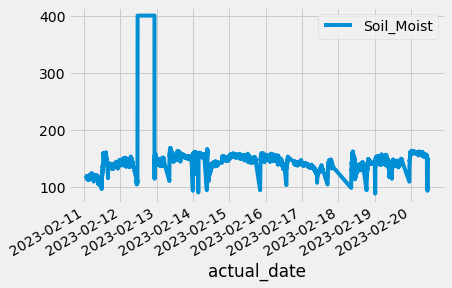

In [11]:
data1.plot(x = 'actual_date', y = 'Soil_Moist')
plt.show()

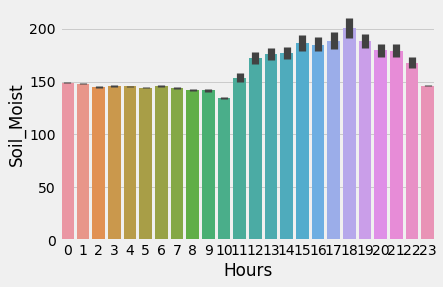

In [12]:
sns.barplot(x = 'Hours', y = 'Soil_Moist', data = data1)
plt.show()

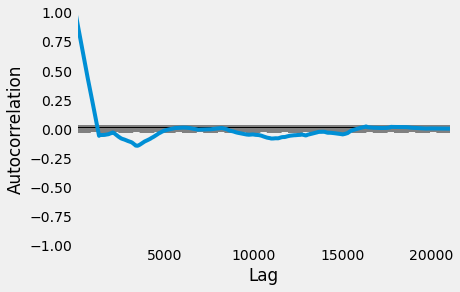

In [13]:
pd.plotting.autocorrelation_plot(data1['Soil_Moist'])
plt.show()

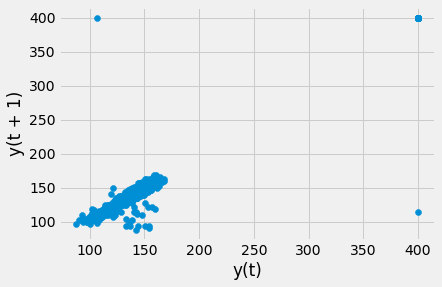

In [14]:
pd.plotting.lag_plot(data1['Soil_Moist'])
plt.show()

In [15]:
df1=data1.reset_index()['Soil_Moist']

In [16]:
df1.shape

(21128,)

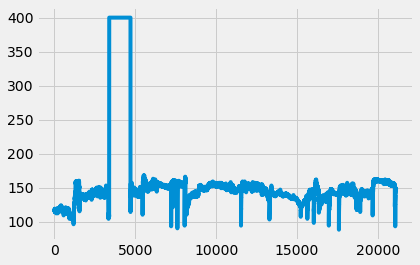

In [17]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [18]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
df1.shape

(21128, 1)

In [20]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
import numpy

In [22]:
def create_dataset (dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range (len(dataset)- time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [23]:
time_step=100
X_train, y_train = create_dataset (train_data, time_step)
X_test, ytest =create_dataset(test_data, time_step) 

In [24]:
print (X_train)

[[0.09294872 0.08974359 0.09294872 ... 0.08974359 0.08653846 0.08333333]
 [0.08974359 0.09294872 0.08974359 ... 0.08653846 0.08333333 0.08333333]
 [0.09294872 0.08974359 0.09294872 ... 0.08333333 0.08333333 0.08333333]
 ...
 [0.16025641 0.16025641 0.16025641 ... 0.16346154 0.16346154 0.16346154]
 [0.16025641 0.16025641 0.16025641 ... 0.16346154 0.16346154 0.16346154]
 [0.16025641 0.16025641 0.16025641 ... 0.16346154 0.16346154 0.16346154]]


In [25]:
print(X_train.shape)
print(y_train.shape)

(13632, 100)
(13632,)


In [26]:
print(X_test.shape)
print(ytest.shape)

(7294, 100)
(7294,)


In [27]:
len(test_data)

7395

In [28]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [30]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
X_train[:100]

array([[[0.09294872],
        [0.08974359],
        [0.09294872],
        ...,
        [0.08974359],
        [0.08653846],
        [0.08333333]],

       [[0.08974359],
        [0.09294872],
        [0.08974359],
        ...,
        [0.08653846],
        [0.08333333],
        [0.08333333]],

       [[0.09294872],
        [0.08974359],
        [0.09294872],
        ...,
        [0.08333333],
        [0.08333333],
        [0.08333333]],

       ...,

       [[0.08974359],
        [0.08653846],
        [0.08333333],
        ...,
        [0.09615385],
        [0.08653846],
        [0.08974359]],

       [[0.08653846],
        [0.08333333],
        [0.08333333],
        ...,
        [0.08653846],
        [0.08974359],
        [0.09615385]],

       [[0.08333333],
        [0.08333333],
        [0.08333333],
        ...,
        [0.08974359],
        [0.09615385],
        [0.09294872]]])

In [33]:
model.fit(X_train,y_train, validation_data=(X_test,ytest),epochs=20, batch_size=64, verbose=1)

Epoch 1/20
213/213 [==============================] - 50s 210ms/step - loss: 0.0033 - val_loss: 1.0875e-04
Epoch 2/20
213/213 [==============================] - 42s 196ms/step - loss: 8.7611e-04 - val_loss: 9.2593e-05
Epoch 3/20
213/213 [==============================] - 40s 190ms/step - loss: 7.5797e-04 - val_loss: 1.6144e-04
Epoch 4/20
213/213 [==============================] - 39s 185ms/step - loss: 6.5191e-04 - val_loss: 6.4267e-04
Epoch 5/20
213/213 [==============================] - 40s 186ms/step - loss: 5.6330e-04 - val_loss: 7.2062e-05
Epoch 6/20
213/213 [==============================] - 39s 183ms/step - loss: 5.6152e-04 - val_loss: 1.2906e-04
Epoch 7/20
213/213 [==============================] - 39s 183ms/step - loss: 4.7259e-04 - val_loss: 6.4727e-05
Epoch 8/20
213/213 [==============================] - 40s 186ms/step - loss: 4.0834e-04 - val_loss: 6.2362e-05
Epoch 9/20
213/213 [==============================] - 38s 178ms/step - loss: 3.7112e-04 - val_loss: 6.2257e-05
Epoch

In [34]:
import tensorflow as tf

In [35]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [36]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

184.7253428154683

In [38]:
math.sqrt(mean_squared_error(ytest,test_predict))

140.9855486230981

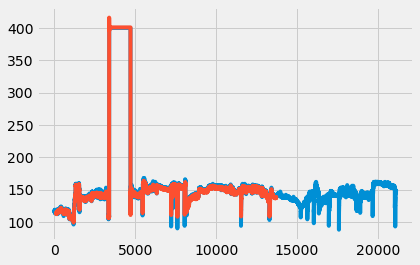

In [39]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1: len(df1)-1,:] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.show()

In [40]:
x_input= test_data[7294:].reshape(1,-1)
x_input.shape

(1, 101)

In [41]:
x_input= test_data[7294:].reshape(1,-1)

In [42]:
x_input.shape

(1, 101)

In [43]:
size=x_input.shape[1]

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [46]:
size_inp=X_train.shape[1]

In [47]:
from numpy import array

lst_output=[]
n_steps=size_inp
i=0
while(i<10):
    if(len(temp_input)>n_steps):
        x_input=tf.convert_to_tensor(np.array(temp_input[1:]))
        print("{} day input {}". format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}". format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat= model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

0 day input [0.20512821 0.21153846 0.21153846 0.21474359 0.21153846 0.21474359
 0.21153846 0.20833333 0.21153846 0.20833333 0.20512821 0.20833333
 0.20833333 0.21153846 0.20512821 0.20833333 0.20833333 0.20512821
 0.20833333 0.20833333 0.20833333 0.20192308 0.20833333 0.10897436
 0.11217949 0.11538462 0.11217949 0.11538462 0.12179487 0.12820513
 0.12820513 0.12820513 0.12820513 0.13141026 0.13782051 0.14102564
 0.1474359  0.1474359  0.15064103 0.15384615 0.15705128 0.16025641
 0.16025641 0.16346154 0.15384615 0.15064103 0.14423077 0.01602564
 0.04487179 0.09615385 0.10897436 0.10897436 0.11858974 0.12179487
 0.12179487 0.13141026 0.13141026 0.13461538 0.13782051 0.13782051
 0.13782051 0.14423077 0.1474359  0.15384615 0.16346154 0.16346154
 0.16987179 0.16346154 0.16987179 0.17628205 0.17628205 0.17307692
 0.17628205 0.17628205 0.17628205 0.17948718 0.17628205 0.18269231
 0.18269231 0.17628205 0.18269231 0.17948718 0.18589744 0.18589744
 0.18269231 0.18589744 0.18910256 0.18589744 0.189

7 day output [[0.17202048]]
8 day input [0.21153846 0.20833333 0.20512821 0.20833333 0.20833333 0.21153846
 0.20512821 0.20833333 0.20833333 0.20512821 0.20833333 0.20833333
 0.20833333 0.20192308 0.20833333 0.10897436 0.11217949 0.11538462
 0.11217949 0.11538462 0.12179487 0.12820513 0.12820513 0.12820513
 0.12820513 0.13141026 0.13782051 0.14102564 0.1474359  0.1474359
 0.15064103 0.15384615 0.15705128 0.16025641 0.16025641 0.16346154
 0.15384615 0.15064103 0.14423077 0.01602564 0.04487179 0.09615385
 0.10897436 0.10897436 0.11858974 0.12179487 0.12179487 0.13141026
 0.13141026 0.13461538 0.13782051 0.13782051 0.13782051 0.14423077
 0.1474359  0.15384615 0.16346154 0.16346154 0.16987179 0.16346154
 0.16987179 0.17628205 0.17628205 0.17307692 0.17628205 0.17628205
 0.17628205 0.17948718 0.17628205 0.18269231 0.18269231 0.17628205
 0.18269231 0.17948718 0.18589744 0.18589744 0.18269231 0.18589744
 0.18910256 0.18589744 0.18910256 0.18910256 0.18910256 0.19551282
 0.19230769 0.19230769 

In [48]:
day_new=np.arange(1,101)
day_pred=np.arange(101,130)

In [49]:
import matplotlib.pyplot as plt

In [50]:
len(df1)

21128

In [51]:
df3=df1.tolist()
df3.extend(lst_output)

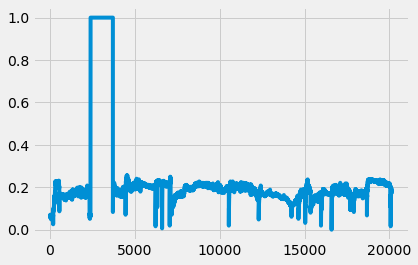

In [52]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [53]:
lst_output

[[0.1866222620010376],
 [0.18432565033435822],
 [0.1820596307516098],
 [0.1798907071352005],
 [0.17781606316566467],
 [0.17582212388515472],
 [0.1738944798707962],
 [0.17202048003673553],
 [0.17019003629684448],
 [0.16839569807052612]]

In [54]:
test_predict

array([[141.00009],
       [140.86594],
       [140.84093],
       ...,
       [147.46791],
       [147.60274],
       [147.15305]], dtype=float32)

In [55]:
Soil_1 = scaler.inverse_transform(lst_output)
Soil_1 = pd.DataFrame((Soil_1), columns = ['Soil_Moist_New'])
Soil_1

,Soil_Moist_New
0,146.226146
1,145.509603
2,144.802605
3,144.125901
4,143.478612
5,142.856503
6,142.255078
7,141.670390
8,141.099291
9,140.539458
